# 训练逻辑回归模型

In [1]:
# 导入工具包
# 导入数据处理和数据分析的包
import pandas as pd
# 导入科学计算，矩阵计算的包
import numpy as np
#导入可视化展示
import matplotlib.pyplot as plt


# 把图镶嵌到notebook中
%matplotlib inline

In [2]:
data = pd.read_csv('./data/csv/creditcard.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Recall = TP/(TP+FN)
 # p : 关注什么什么就是positive，此时关注异常样本
    # TP: 就是异常样本被当做异常样本取出
    # FN: 就是正常样本被当做异常样本取出来了
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report

In [4]:
def printing_Kfold_scores(x_train_data,y_train_data):
    # shuffle： 此时可以不洗牌，平均分成5份
    fold = KFold(5,shuffle = False,random_state=None)
    
    # 定义不同力度的正则化惩罚力度
    c_param_range = [0.01,0.1,1,10,100]
    
    # 展示结果用的表格
    results_table = pd.DataFrame(index = range(len(c_param_range),2),
                                 columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range
    
    # K-fold 表示K折的交叉验证，这里会得到两个索引集合：训练集 = indicex[0],验证集 = indices[1]
    j = 0
    # 循环遍历不同的参数
    for c_param in c_param_range:
        print("-----------------------------------------------")
        print("正则化惩罚力度：",c_param)
        print("_______________________________________________")
        print("")
        
        recall_accs = []
        
        # 分解进行交叉验证
        # iteration: 第几次交叉验证
        # indices：得到的索引标签
        # 对每一个参数进行交叉验证
        # 出现错误：TypeError: 'KFold' object is not iterable
        # 修改为： fold.split(x_train_data)
        for iteration,indices in enumerate(fold.split(x_train_data),start=1):
            
            # 指定算法模型，并且给定参数，构建模型：逻辑回归模型
            lr = LogisticRegression(C = c_param,penalty = 'l1')
            
            # 调节模型，注意索引，训练集一定要传入训练集，x,y 的索引都是0
            # 训练模型   .fit()
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            
            # 建立好模型后，预测模型结果，用验证集，索引为1
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)
            
            # 有预测结果，就可以评估了，用recall_score () ，需要传入预测值和真实值
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            
            # 之后算平均，所以保存每一步的结果
            recall_accs.append(recall_acc)
            print("Iteration",iteration,'召回率 = ',recall_acc)
            
            
        results_table.loc[j,"Mean recall score"] = np.mean(recall_accs)   
        j +=1
        print("")
        print("平均召回率",np.mean(recall_accs))
        print("")
        
        
    # 找到最好的参数，哪一个Recall 值高，就是模型较好
    best_c = results_table.loc[results_table['Mean recall score'].astype('float32').idxmax()]['C_parameter']
    # 打印出最好的结果
    print('************************************************88')
    print("效果最好的模型所选的参数 = ",best_c)        
    print('************************************************88')
        
    return best_c

In [5]:
%matplotlib inline

# 进行数据处理
import pandas as pd

# 进行可视化展示
import matplotlib.pyplot as plt


In [6]:
import sklearn
from sklearn.datasets.california_housing import fetch_california_housing

In [7]:
# 直接将内置的数据集加载进来： 房价的数据集
housing = fetch_california_housing()
print(housing.DESCR)


# 解释说明的网站
# This dataset was obtained from the StatLib repository.
# http://lib.stat.cmu.edu/datasets/

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [8]:
# 查看数据集的数据类型
housing.data.shape

(20640, 8)

In [9]:
housing.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [10]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characte

# 树模型参数：
- 1.基尼系数或者是熵值（衡量标准）
- 2.splitler best or random 前者是从所有的特征值中寻找最好的切分点，后者是从部分特征值中寻找（特征较多）（默认为best）
- 3.max_features None(所有):log2,sqrt,N特征小于50的时候使用所有的
- 4.max_depth:数据少或者特征少的时候就可以不管这个值了
- 5.min_samples_split: 控制某叶子节点的样本数目，不小于最小的个数，
- 6.min_samples_leaf: 控制叶子节点的最少样本数目
- 7.min_weight_fracction_leaf: 限制叶子节点所有样本的权重和最小值
- 8.max_leaf_nodes:通过限制叶子节点的数目，防止过拟合
- 9.class_weight:指定样本个类别的权重，防止训练集某些类别的样本过多导致训练的决策树过于偏向这些类别
- n_estimators:要建立数的个数

In [11]:
#  Latitude : 精度对结果的影响
#  Longitude ： 维度对结果的影响

# 导入tree模块
from sklearn import tree
# 可进行分类，回归

# 实例化树的模型，并且传进参数最大深度，
dtr = tree.DecisionTreeRegressor(max_depth = 2)
# fit() 函数进行训练模型，
dtr.fit(housing.data[:,[6,7]],housing.target)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [12]:
# 只需要指定dtr,和feature_names，两者就行
dot_data = tree.export_graphviz(dtr,
                                out_file = None,
                                # 打印特征名字，传进来
                                feature_names = housing.feature_names[6:8],
                                filled = False,
                                impurity = False,
                                rounded = True)

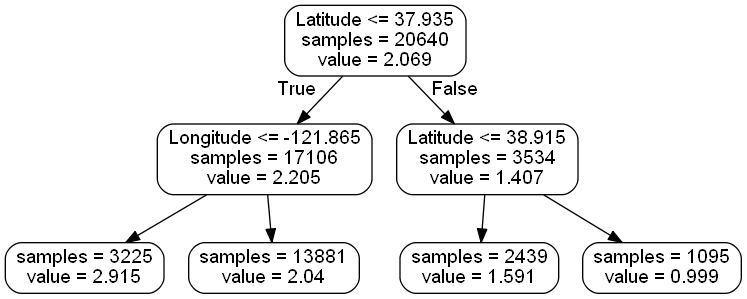

In [13]:
import pydotplus
# pip install pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("#FFF2DD")
from IPython.display import Image
Image(graph.create_png())

In [14]:
# 可以画的本地，保存为png的格式
graph.write_png("dt_white_background.png")

True

In [15]:
from sklearn.model_selection import train_test_split

# 将数据集进行切分：train_test_split（数据x,标签y,test_size：10%为测试集）
# random_state：指定随机的种子，使得每次的随机的切分都是在同一处，保证变量只有一个
data_train,data_test,target_train,target_test = train_test_split(housing.data,
                                                                 housing.target,
                                                                 test_size = 0.1,
                                                                random_state = 42)

# 构造树模型。进行实例化
dtr = tree.DecisionTreeRegressor(random_state = 42)
# 训练模型
dtr.fit(data_train,target_train)

dtr.score(data_test,target_test)

0.637355881715626

In [16]:
#  https://scikit-learn.org/stable/

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 42)
rfr.fit(data_train,target_train)
rfr.score(data_test,target_test)

d:\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7910601348350835

In [19]:
# # 很多库都移到model_selection 中了
from sklearn.model_selection import GridSearchCV
# 选择参数:GridSearchCV

tree_param_grid = {'min_samples_split':list((3,6,9)),'n_estimators':list((10,50,100))}
# cv = 5: 交叉验证的次数
grid = GridSearchCV(RandomForestRegressor(),param_grid = tree_param_grid,cv = 5)
grid.fit(data_train,target_train)
grid.best_params_,grid.best_score_
# # GridSearchCV： 没有grid_scores这个属性，
# # Attributes：
# 　　best_estimator_：效果最好的分类器

# 　　best_score_：成员提供优化过程期间观察到的最好的评分

# 　　best_params_：描述了已取得最佳结果的参数的组合

# 　　best_index_：对应于最佳候选参数设置的索引(cv_results_数组的索引)。

({'min_samples_split': 3, 'n_estimators': 100}, 0.8074028448774795)